In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from math import log, sqrt

In [2]:
with open("/mnt/helios/tiktok/Data/collected/mentalHealthAwareness_random_global_20230415_50c4bb12-79ea-11ee-ae03-fa163e4f549c.json","rt") as f:
    data = json.load(f)

In [3]:
data

{'results': [{'username': 'melssm3lls',
   'comment_count': 0,
   'create_time': 1681535633,
   'music_id': 6907736186085739265,
   'region_code': 'US',
   'share_count': 0,
   'hashtag_names': ['mentalhealthawarenessmonth'],
   'id': 7222140420447407402,
   'like_count': 71,
   'video_description': '#mentalhealthawarenessmonth ',
   'view_count': 0},
  {'hashtag_names': ['mentalillness',
    'mentalhealth',
    'mentalhealthmatters',
    'mentalhealthawareness'],
   'music_id': 7222193375640931074,
   'region_code': 'MY',
   'share_count': 0,
   'username': 'depress99p',
   'video_description': '#mentalillness #mentalhealthawareness #mentalhealthmatters #mentalhealth ',
   'comment_count': 0,
   'create_time': 1681547934,
   'id': 7222193346633157896,
   'like_count': 8,
   'view_count': 245},
  {'id': 7222410108444200197,
   'region_code': 'PH',
   'share_count': 4,
   'view_count': 1285,
   'playlist_id': 7209876515369798406,
   'username': 'okslngg',
   'video_description': '#menta

In [4]:
# Convert JSON to DataFrame
df = pd.DataFrame(data["results"])

In [5]:
df

,username,comment_count,create_time,music_id,region_code,share_count,hashtag_names,id,like_count,video_description,view_count,playlist_id,effect_ids,voice_to_text
0,melssm3lls,0,1681535633,6907736186085739265,US,0,[mentalhealthawarenessmonth],7222140420447407402,71,#mentalhealthawarenessmonth,0,NaN,NaN,NaN
1,depress99p,0,1681547934,7222193375640931074,MY,0,"[mentalillness, mentalhealth, mentalhealthmatt...",7222193346633157896,8,#mentalillness #mentalhealthawareness #mentalh...,245,NaN,NaN,NaN
2,okslngg,2,1681598401,6981438376045972251,PH,4,"[mentalhealthmatters, mentalhealthawareness]",7222410108444200197,101,#mentalhealthmatters #mentalhealthawareness,1285,7.209877e+18,NaN,NaN
3,beautyqueen20225,1,1681578616,6840013492871759873,GB,6,"[mentalhealthmatters, mentalhealthawareness]",7222325150325214469,13,#mentalhealthawareness #mentalhealthmatters,325,NaN,NaN,NaN
4,katecorr0,0,1681578348,7222323939700443930,IE,0,"[mh, fy, mentalillness, mentalhealth, mentalhe...",7222323931489914139,5,#CapCut #mh #fypシ #genishimpact34 #mentalhealt...,32,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,youraveragebitch21,1,1681582799,7178788667106789377,US,0,"[fyp, mentalhealthawareness, depressionanxiety]",7222343058086710574,4,#mentalhealthawareness#fyp#depressionanxiety,9,NaN,NaN,NaN
159,omfgitsfall_king86,24,1681585730,7165012185284938542,US,0,"[imfine, keepgoing, dontgiveup, fyp, mentalhea...",7222355670446738734,80,#mentalhealth #mentalhealthmatters #mentalheal...,108,NaN,NaN,NaN
160,julessbpd,2,1681585251,7097353305973852974,NO,1,"[mentalillness, mentalhealth, mentalhealthmatt...",7222353546883206427,66,#bpd #bpdtiktok #bpdtok #bpdawareness #mentalh...,844,NaN,NaN,NaN
161,vent_.acc221,1,1681521281,7194954633909996294,SE,0,"[sh, anxiety, foryou, vent, mentalhealthawaren...",7222078885419027717,40,•Im sorry if u relate<3• #vent#ventpost#ventac...,1016,NaN,NaN,NaN


In [6]:
# Define the directory containing JSON files
collected_directory = Path("/mnt/helios/tiktok/Data/collected")

In [7]:
# Load and concatenate JSON data
dataframes = []
for json_file in collected_directory.glob("mental*.json"):  # Match files starting with "mental"
    with open(json_file, "r", encoding="utf-8") as f:
        data = json.load(f)  # Parse JSON
        if "results" in data:  # Ensure "results" key exists
            df = pd.DataFrame(data["results"])
            df["source_file"] = json_file.name  # Add source filename column
            dataframes.append(df)

In [8]:
combined_df = pd.concat(dataframes, ignore_index=True)

In [9]:
combined_df

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.241283e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080006e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"[mentalhealth, mentalhealthmatters, mentalheal...",7241312338358340890,3.0,7.235458e+18,GB,27,[20262908],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"[mentalillness, mentalhealthmatters, mentalhea...",7241348708799876379,25.0,7.238682e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"[sh, mentalhealthmatters, mentalhealthawarenes...",7240370538189786394,698.0,6.986301e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"[fyp, mentalhealth, ilovemygf, vent, mentalhea...",7240480621590514971,206.0,7.121429e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43214,5,nakeva_a,#trending #balkantiktok #novisadmojgrad #novis...,3.0,1685814587,"[trending, balkan, fyp, mentalhealth, novisad,...",7240518504120667397,46.0,7.217246e+18,RS,974,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN
43215,0,mandyleadingham2,#mentalhealthawareness #mentalhealthawarenessm...,0.0,1685814731,"[loveyourself, bipolardisorder, mentalhealthaw...",7240519089599302954,23.0,6.704960e+18,US,3,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN


In [10]:
combined_df['id'] = combined_df['id'].astype(str)

In [11]:
combined_df['music_id'] = combined_df['music_id'].astype(str)

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43217 entries, 0 to 43216
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   share_count        43217 non-null  int64  
 1   username           43217 non-null  object 
 2   video_description  43217 non-null  object 
 3   comment_count      43065 non-null  float64
 4   create_time        43217 non-null  int64  
 5   hashtag_names      43217 non-null  object 
 6   id                 43217 non-null  object 
 7   like_count         43193 non-null  float64
 8   music_id           43217 non-null  object 
 9   region_code        43217 non-null  object 
 10  view_count         43217 non-null  int64  
 11  effect_ids         1607 non-null   object 
 12  voice_to_text      3086 non-null   object 
 13  playlist_id        568 non-null    float64
 14  source_file        43217 non-null  object 
 15  favorites_count    3646 non-null   float64
dtypes: float64(4), int64(3

In [13]:
# Define the text columns to combine
text_columns = ["video_description", "hashtag_names", "voice_to_text"]

In [14]:
# Fill NaN values with empty strings and combine the columns into a new one
combined_df["combined_text"] = combined_df[text_columns].fillna("").astype(str).agg(" ".join, axis=1)

In [15]:
combined_df

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.24128320968878e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080005542764137e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"[mentalhealth, mentalhealthmatters, mentalheal...",7241312338358340890,3.0,7.235458278925307e+18,GB,27,[20262908],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767063748005e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"[mentalillness, mentalhealthmatters, mentalhea...",7241348708799876379,25.0,7.238681754466094e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"[sh, mentalhealthmatters, mentalhealthawarenes...",7240370538189786394,698.0,6.986301024097127e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#sh #mentalhealthmatters #mentalhealthawarenes...
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"[fyp, mentalhealth, ilovemygf, vent, mentalhea...",7240480621590514971,206.0,7.121429139239833e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,only girl i need n want 🙏 – #MentalHealth #men...
43214,5,nakeva_a,#trending #balkantiktok #novisadmojgrad #novis...,3.0,1685814587,"[trending, balkan, fyp, mentalhealth, novisad,...",7240518504120667397,46.0,7.217245908298124e+18,RS,974,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#trending #balkantiktok #novisadmojgrad #novis...
43215,0,mandyleadingham2,#mentalhealthawareness #mentalhealthawarenessm...,0.0,1685814731,"[loveyourself, bipolardisorder, mentalhealthaw...",7240519089599302954,23.0,6.704959758832503e+18,US,3,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#mentalhealthawareness #mentalhealthawarenessm...


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF

In [17]:
# Ensure stopwords are downloaded
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pranay22/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
domain_stopwords = {"mentalhealth", "mentalhealthawareness", "mentalhealthmatters", "mentalhealthawarenessmonth", "mentalillness",
                     "mentalhealthawarness", "mentalhealthtiktok", "mentalhealthtiktoks", "mentalhealthawarenessweek", "mental", 
                     "health", "awareness", "month", "may", "dont", "matters", "mentalhealthmonth", "mentalillnessawareness",
                     "mentalillnessawarenessweek"}

In [19]:
social_media_stopwords = {"fyp", "fy", "fypviral", "foryou", "foryourpage", "tiktok", "capcut", "xyzbca", "sweden", "viralvideos",
                          "viral", "trending", "outpatient", "foryoupage", "fypage", "fyppppppppppppppppppppppp","viraltiktok",
                          "greenscreenvideo", "greenscreen", "youre", "like", "im", "know", "get", "um", "xzybca", "tw", "xyzcba",
                          "really", "people", "things", "viralvideo", "ive", "yeah", "painhub", "fyfyfy", "fr", "mh", "sh"}

In [20]:
default_stopwords = set(stopwords.words("english"))
all_stopwords = default_stopwords.union(domain_stopwords).union(social_media_stopwords)

In [21]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters & numbers
    words = text.split()  # Tokenize
    words = [word for word in words if word not in all_stopwords]  # Remove stopwords
    return " ".join(words)

In [22]:
# Apply preprocessing to the combined text column
combined_df["processed_text"] = combined_df["combined_text"].fillna("").apply(preprocess_text)

### LDA with CountVectorizer

In [23]:
# Convert text into a document-term matrix using CountVectorizer
# vectorizer = CountVectorizer(max_features=5000, stop_words="english")  # Limit vocab size for efficiency
vectorizer = CountVectorizer(max_features=5000, stop_words=list(all_stopwords))
text_matrix = vectorizer.fit_transform(combined_df["processed_text"])

In [24]:
# Apply LDA for topic modeling (Choose the number of topics)
num_topics = 8  # Change based on your need
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(text_matrix)

LatentDirichletAllocation(n_components=8, random_state=42)

In [23]:
# Get top words per topic
def display_topics(model, feature_names, num_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[::-1][:num_words]
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in top_indices]
    return topics

In [26]:
# Extract and show topics
topics = display_topics(lda_model, vectorizer.get_feature_names_out(), num_words=10)
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: feel, one, thats, go, time, okay, life, want, going, gonna
Topic 2: selfcare, depression, selflove, anxiety, therapy, recovery, motivation, love, mindfulness, endthestigma
Topic 3: vent, bpd, depression, bpdtiktok, bpdawareness, venting, sad, ventaccount, ed, trend
Topic 4: love, day, suicideprevention, life, good, hope, care, ok, one, keep
Topic 5: relatable, real, mensmentalhealth, healingjourney, addictionrecovery, que, bekind, sad, pourtoi, drecovery
Topic 6: depression, anxiety, sad, pain, depressed, bipolar, tired, real, itsokaytonotbeokay, stress
Topic 7: anxiety, depression, depressionanxiety, depresion, ptsd, duet, healing, trauma, anxietyrelief, depressionawareness
Topic 8: love, youmatter, youarenotalone, happy, mentalheath, support, blowthisup, friends, dontgiveup, addiction


In [27]:
# Assign each video a dominant topic
topic_assignments = lda_model.transform(text_matrix).argmax(axis=1)
combined_df["topic"] = topic_assignments

In [28]:
combined_df

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text,processed_text,topic
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.24128320968878e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...,depression depression,5
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080005542764137e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...,miss used depression anxiety sad ptsd depresse...,5
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"[mentalhealth, mentalhealthmatters, mentalheal...",7241312338358340890,3.0,7.235458278925307e+18,GB,27,[20262908],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...,,0
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767063748005e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...,,0
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"[mentalillness, mentalhealthmatters, mentalhea...",7241348708799876379,25.0,7.238681754466094e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"[sh, mentalhealthmatters, mentalhealthawarenes...",7240370538189786394,698.0,6.986301024097127e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#sh #mentalhealthmatters #mentalhealthawarenes...,deppresesed menhealthmatters deppresesed menhe...,1
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"[fyp, mentalhealth, ilovemygf, vent, mentalhea...",7240480621590514971,206.0,7.121429139239833e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,only girl i need n want 🙏 – #MentalHealth #men...,girl need n want vent ilovemygf ilovemygf vent,0
43214,5,nakeva_a,#trending #balkantiktok #novisadmojgrad #novis...,3.0,1685814587,"[trending, balkan, fyp, mentalhealth, novisad,...",7240518504120667397,46.0,7.217245908298124e+18,RS,974,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#trending #balkantiktok #novisadmojgrad #novis...,balkantiktok novisadmojgrad novisad balkan bal...,0
43215,0,mandyleadingham2,#mentalhealthawareness #mentalhealthawarenessm...,0.0,1685814731,"[loveyourself, bipolardisorder, mentalhealthaw...",7240519089599302954,23.0,6.704959758832503e+18,US,3,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#mentalhealthawareness #mentalhealthawarenessm...,bipolardisorder loveyourself loveyourself bipo...,5


In [29]:
combined_df["topic"].value_counts()

topic
0    14846
6     6940
5     4104
2     4103
1     3763
3     3621
7     3312
4     2528
Name: count, dtype: int64

### Importance score

In [30]:
# lda_model.components_ has shape (num_topics, num_words)
word_topic_matrix = lda_model.components_
num_topics, num_words = word_topic_matrix.shape

In [31]:
# Compute the relative frequency for each word in each topic (F_in)
# For each topic α: topic_word_freq[α, w] = n_α(w) / (total words in topic α)
topic_word_freq = word_topic_matrix / word_topic_matrix.sum(axis=1, keepdims=True)

In [32]:
# Compute the global relative frequency for each word (across all topics)
# global_word_freq[w] = (total count of word w across topics) / (total words across all topics)
global_word_freq = word_topic_matrix.sum(axis=0) / word_topic_matrix.sum()

In [33]:
# For each word, compute the importance I(w) = max_α [F_in^α(w) - F_out^α(w)]
# Where F_out^α(w) = (global_word_freq[w] - F_in^α(w)) / (num_topics - 1)
word_importance = np.zeros(num_words)
for w in range(num_words):
    diffs = []
    for topic in range(num_topics):
        F_in = topic_word_freq[topic, w]
        # Distribute the remaining global frequency among all other topics
        F_out = (global_word_freq[w] - F_in) / (num_topics - 1)
        diffs.append(F_in - F_out)
    word_importance[w] = max(diffs)

In [34]:
# For each topic, compute a topic-specific score for each word.
# Here we multiply the topic-specific frequency by the word importance score.
# Then, extract the top words based on this new score.
top_words_per_topic = {}
feature_names = vectorizer.get_feature_names_out()

In [35]:
for topic in range(num_topics):
    # For each word in topic, score = (relative frequency in topic) * (word importance)
    topic_scores = topic_word_freq[topic, :] * word_importance
    # Get indices of the top 10 words (adjust the number if desired)
    top_indices = np.argsort(topic_scores)[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_words_per_topic[f"Topic {topic + 1}"] = top_words

In [36]:
# Display the refined topic words
for topic, words in top_words_per_topic.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: anxiety, depression, day, life, love, feel, therapy, one, thats, go
Topic 2: anxiety, depression, selfcare, selflove, therapy, love, recovery, motivation, ptsd, mindfulness
Topic 3: vent, bpd, depression, anxiety, sad, bpdtiktok, bpdawareness, venting, ventaccount, ed
Topic 4: love, day, suicideprevention, life, good, hope, care, ok, one, tired
Topic 5: relatable, real, sad, mensmentalhealth, healingjourney, depression, addictionrecovery, que, bekind, pourtoi
Topic 6: depression, anxiety, sad, pain, depressed, bipolar, real, tired, itsokaytonotbeokay, stress
Topic 7: anxiety, depression, depressionanxiety, depresion, ptsd, duet, healing, trauma, anxietyrelief, depressionawareness
Topic 8: love, youmatter, youarenotalone, happy, mentalheath, support, blowthisup, friends, dontgiveup, healing


### NMF with TfidfVectorizer

In [24]:
# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=list(all_stopwords))
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df["processed_text"])

In [25]:
# Define the number of topics
num_topics = 8

In [26]:
# Fit an NMF model on the TF-IDF matrix
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

NMF(n_components=8, random_state=42)

In [27]:
# Get the feature names (i.e., words)
feature_names = tfidf_vectorizer.get_feature_names_out()

In [28]:
# Extract and display topics
topics = display_topics(nmf_model, feature_names)
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: anxiety, ptsd, anxietyrelief, adhd, anxietydisorder, anxietyawareness, stress, pain, ocd, panicattack
Topic 2: vent, venting, ventaccount, sad, ventfeelings, thoughts, drained, sa, ventacc, depressed
Topic 3: depression, sad, ptsd, depressed, depressionawareness, paintok, pain, real, bipolar, mentaldisorder
Topic 4: depressionanxiety, pain, depressionawareness, sad, depressedtiktok, anxietydisorder, mentalbreakdown, sadtok, overthinking, anxietyrelief
Topic 5: relatable, real, sad, venting, drained, love, pain, help, letsbereal, mensmentalhealth
Topic 6: bpd, bpdtiktok, bpdawareness, bipolar, ptsd, eupd, adhd, bpdtok, autism, borderlinepersonalitydisorder
Topic 7: selfcare, selflove, love, therapy, motivation, mindfulness, recovery, ptsd, healing, endthestigma
Topic 8: depresion, sad, duet, pain, bipolar, alone, tired, ptsd, ptsdawareness, life


In [29]:
# Get the topic-word matrix from the NMF model.
# This matrix is of shape (num_topics, num_words)
topic_word_matrix = nmf_model.components_

In [30]:
# Build a dictionary of Counters for each topic.
# We'll treat the weights from NMF as frequencies.
corpora_dic = {}
for topic_idx in range(num_topics):
    # For each topic, create a dictionary mapping each word to its weight.
    topic_dict = {feature_names[i]: topic_word_matrix[topic_idx, i] for i in range(len(feature_names))}
    corpora_dic[topic_idx] = Counter(topic_dict)

In [31]:
# Create a background counter by summing across all topics.
bg_counter = Counter()
for counter in corpora_dic.values():
    bg_counter.update(counter)

In [32]:
# Define the logodds function (as provided)
def logodds(corpora_dic, bg_counter):
    """
    Calculates the log odds ratio of each term's frequency between a target corpus and 
    the remaining corpora, incorporating prior information from a background corpus.
    
    Returns a dictionary of dictionaries: {topic: {word: z_score, ...}, ...}.
    """
    corp_size = {c: sum(corpora_dic[c].values()) for c in corpora_dic}
    bg_size = sum(bg_counter.values())
    result = {c: {} for c in corpora_dic}
    
    for name, c in corpora_dic.items():
        for word in c:
            fi = c[word]
            # Sum the frequency of the word in all other topics.
            fj = sum(co[word] for x, co in corpora_dic.items() if x != name)
            fbg = bg_counter[word]
            ni = corp_size[name]
            nj = sum(x for idx, x in corp_size.items() if idx != name)
            nbg = bg_size
            # Calculate the log odds ratio
            oddsratio = log(fi + fbg) - log(ni + nbg - (fi + fbg)) - log(fj + fbg) + log(nj + nbg - (fj + fbg))
            std = 1.0 / (fi + fbg) + 1.0 / (fj + fbg)
            z = oddsratio / sqrt(std)
            result[name][word] = z
    return result

In [33]:
# Compute the log odds scores for each word in each topic.
logodds_results = logodds(corpora_dic, bg_counter)

In [34]:
# Now, for each topic, we can sort the words by their log odds (z-scores) in descending order.
# Let's print the top 10 words per topic based on the log odds score.
for topic_idx in range(num_topics):
    # Get the dictionary of words and their scores for the topic.
    word_scores = logodds_results[topic_idx]
    # Sort words by descending z-score.
    top_words = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    # Print only the word (or word and score if desired)
    top_words_str = ", ".join([word for word, score in top_words])
    print(f"Topic {topic_idx + 1}: "+top_words_str)

Topic 1: anxiety, anxietyrelief, anxietydisorder, anxietyawareness, panicattack, anxietycheck, anxious, socialanxiety, anxietysquad, anxietyhub
Topic 2: vent, venting, ventaccount, ventfeelings, ventacc, thoughts, ventpost, deppressed, ventingaccount, sa
Topic 3: depression, depressionawareness, mentalwellbeing, einfachsam, paintok, mentaldisorder, depressed, sucks, exhausted, ptbs
Topic 4: depressionanxiety, depressionawareness, depressedtiktok, familyproblems, pdd, knowyourlimits, depressionisnotajoke, mentalbreakdown, depressedtok, depressionanxietybattles
Topic 5: relatable, real, letsbereal, drained, sad, helpme, speakout, ventwithme, areyouok, venting
Topic 6: bpd, bpdtiktok, bpdawareness, bipolar, eupd, bpdtok, autism, adhd, borderlinepersonalitydisorder, autismawareness
Topic 7: selfcare, selflove, love, therapy, motivation, mindfulness, healing, recovery, wellness, endthestigma
Topic 8: depresion, sad, duet, saawareness, brokenhome, depresiontiktok, ptsdawareness, venttok, men

In [35]:
# Get the topic distribution for each document using the NMF model
nmf_topic_distribution = nmf_model.transform(tfidf_matrix)

In [36]:
# For each document, identify the dominant topic (i.e., the topic with the highest weight)
dominant_topics = nmf_topic_distribution.argmax(axis=1) + 1

In [37]:
# Replace the previous "topic" column with the new dominant topic assignments
combined_df['topic'] = dominant_topics

In [38]:
combined_df

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text,processed_text,topic
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.24128320968878e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...,depression depression,3
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080005542764137e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...,miss used depression anxiety sad ptsd depresse...,2
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"[mentalhealth, mentalhealthmatters, mentalheal...",7241312338358340890,3.0,7.235458278925307e+18,GB,27,[20262908],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...,,1
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767063748005e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...,,1
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"[mentalillness, mentalhealthmatters, mentalhea...",7241348708799876379,25.0,7.238681754466094e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...,,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43212,4,y0ursaf3place_,#sh #mentalhealthmatters #mentalhealthawarenes...,31.0,1685780136,"[sh, mentalhealthmatters, mentalhealthawarenes...",7240370538189786394,698.0,6.986301024097127e+18,DE,2909,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#sh #mentalhealthmatters #mentalhealthawarenes...,deppresesed menhealthmatters deppresesed menhe...,8
43213,11,8at.m4n,only girl i need n want 🙏 – #MentalHealth #men...,15.0,1685805771,"[fyp, mentalhealth, ilovemygf, vent, mentalhea...",7240480621590514971,206.0,7.121429139239833e+18,GB,1018,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,only girl i need n want 🙏 – #MentalHealth #men...,girl need n want vent ilovemygf ilovemygf vent,2
43214,5,nakeva_a,#trending #balkantiktok #novisadmojgrad #novis...,3.0,1685814587,"[trending, balkan, fyp, mentalhealth, novisad,...",7240518504120667397,46.0,7.217245908298124e+18,RS,974,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#trending #balkantiktok #novisadmojgrad #novis...,balkantiktok novisadmojgrad novisad balkan bal...,1
43215,0,mandyleadingham2,#mentalhealthawareness #mentalhealthawarenessm...,0.0,1685814731,"[loveyourself, bipolardisorder, mentalhealthaw...",7240519089599302954,23.0,6.704959758832503e+18,US,3,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230603_a...,NaN,#mentalhealthawareness #mentalhealthawarenessm...,bipolardisorder loveyourself loveyourself bipo...,7


In [39]:
combined_df["topic"].value_counts()

topic
7    14389
1    11320
3     4771
6     3416
8     3101
2     2335
4     2085
5     1800
Name: count, dtype: int64

In [40]:
# Save to CSV
combined_df.to_csv('topic_data.csv', index=False)

In [45]:
# Set the option to display the full column width
pd.set_option('display.max_colwidth', None)

In [41]:
# Print 3 random rows
print("\n3 Random videos:")
print(combined_df[['processed_text', 'topic']].sample(5))


3 Random videos:
                                          processed_text  topic
15862                            saawareness saawareness      8
14878                                                         1
8477   respect motivation respect menshealth motivati...      7
10445  find liam break free anxiety years daily battl...      1
31557  ok iamnotokay jellyroll itokaynottobeokay jell...      7


### BERTopic

In [47]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

/mnt/helios/pranay22/miniconda3/envs/myenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
# Minimal pre-processing function for BERTopic
def minimal_preprocess(text):
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [49]:
# Create a new column for BERTopic using the combined text (with minimal cleaning)
combined_df["bert_text"] = combined_df["combined_text"].fillna("").apply(minimal_preprocess)

In [50]:
# Convert the texts into a list of documents
documents = combined_df["processed_text"].tolist()

In [51]:
# Load a pre-trained sentence transformer model (e.g., all-MiniLM-L6-v2)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [52]:
# Create the BERTopic model with the chosen embedding model
topic_model = BERTopic(embedding_model=embedding_model, verbose=True)

In [53]:
# Fit the model and transform the documents into topics
topics, probs = topic_model.fit_transform(documents)

2025-03-11 06:39:04,710 - BERTopic - Embedding - Transforming documents to embeddings.


Batches: 100%|██████████| 1351/1351 [00:55<00:00, 24.43it/s]
2025-03-11 06:40:00,383 - BERTopic - Embedding - Completed ✓
2025-03-11 06:40:00,384 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-11 06:40:42,085 - BERTopic - Dimensionality - Completed ✓
2025-03-11 06:40:42,089 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PAR

In [54]:
# Display the topic info (each row corresponds to a topic)
topic_info = topic_model.get_topic_info()
print(topic_info)

      Topic  Count  \
0        -1   7216   
1         0   6897   
2         1    329   
3         2    316   
4         3    299   
...     ...    ...   
1067   1066     10   
1068   1067     10   
1069   1068     10   
1070   1069     10   
1071   1070     10   

                                                                     Name  \
0                                                -1_gonna_want_feel_wanna   
1                                             0_favours_actives_alicat_hi   
2                          1_anxietymanagement_jeselann_unstoppable_hives   
3                         2_duet_stuckinyourhead_coache_tradinguniversity   
4                                           3_vent_bwulletz_imissmyex_dnd   
...                                                                   ...   
1067        1066_impostersyndrome_emotionalintelligence_meltdown_approach   
1068                  1067_imdoingmybest_bullshitting_forgiveme_goldcoast   
1069                     1068_deprssiontok

In [55]:
# print out the top 10 words for each topic
for topic_num in topic_info.Topic.unique():
    if topic_num == -1:
        # -1 is often used for outliers
        continue
    print(f"Topic {topic_num}:")
    print(topic_model.get_topic(topic_num))
    print("\n")

Topic 0:
[('favours', np.float64(0.5391352232515226)), ('actives', np.float64(0.3343303403243253)), ('alicat', np.float64(0.30411094551882234)), ('hi', np.float64(0.24481971712156017)), ('vs', np.float64(0.24125859882083744)), ('hm', np.float64(0.23712816242802806)), ('act', np.float64(0.2114245463874528)), ('shows', np.float64(0.12628643221541277)), ('ily', np.float64(0.12393185183872024)), ('yes', np.float64(0.055626681359335885))]


Topic 1:
[('anxietymanagement', np.float64(0.028464220985914033)), ('jeselann', np.float64(0.028464220985914033)), ('unstoppable', np.float64(0.027767025914731198)), ('hives', np.float64(0.023484397075290663)), ('worrying', np.float64(0.022756612409754528)), ('anxiety', np.float64(0.02209215753013056)), ('paranoia', np.float64(0.018976147323942687)), ('ebunelle', np.float64(0.017613297806467997)), ('caged', np.float64(0.017613297806467997)), ('stopsuicide', np.float64(0.0161294664721837))]


Topic 2:
[('duet', np.float64(0.08346480194949839)), ('stuckiny

In [56]:
# Iterate over topics (excluding outlier topic -1, if desired)
for topic_num in topic_info['Topic']:
    if topic_num == -1:
        continue  # Skip outliers
    print(f"Topic {topic_num}:")
    # get_topic returns a list of tuples (word, score)
    top_words = topic_model.get_topic(topic_num)
    # Format and print the words (you can adjust the formatting as needed)
    formatted_words = ", ".join([word for word, _ in top_words])
    print(formatted_words, "\n")

Topic 0:
favours, actives, alicat, hi, vs, hm, act, shows, ily, yes 

Topic 1:
anxietymanagement, jeselann, unstoppable, hives, worrying, anxiety, paranoia, ebunelle, caged, stopsuicide 

Topic 2:
duet, stuckinyourhead, coache, tradinguniversity, guardedheart, pesopluma, highfunctioninganxiety, demilovato, whitney, tiktokuk 

Topic 3:
vent, bwulletz, imissmyex, dnd, pey, roblox, addicting, needhelp, ab, ngl 

Topic 4:
somedays, lyriqluchiano, voiceover, depression, tompkins, mic, battling, credit, sam, surely 

Topic 5:
depressionanxiety, endoflife, standupcomedian, loosingasibling, standupcomedy, itsucks, wrden, niemals, likeus, waves 

Topic 6:
healing, naturalhair, iknow, journeynotatrip, normalizetherapy, treating, ima, healingisntlinear, growth, joyjuice 

Topic 7:
insecurities, tennessee, anxiety, insecure, anxiousattachment, transparency, anxious, confusing, angelas, disorder 

Topic 8:
relatable, zoneout, misshim, workhumor, ukpolitics, wld, relatible, mystory, dose, school 

T

In [57]:
# Print the number of topics before reduction
print("Number of topics before reduction:", len(topic_model.get_topic_info()))

Number of topics before reduction: 1072


In [58]:
# Reduce topics to a desired number, for example 10 topics
topic_model = topic_model.reduce_topics(documents, nr_topics=10)

2025-03-11 06:40:48,800 - BERTopic - Topic reduction - Reducing number of topics
2025-03-11 06:40:49,184 - BERTopic - Topic reduction - Reduced number of topics from 1072 to 10


In [59]:
# Get the new topic information
new_topic_info = topic_model.get_topic_info()
print("Number of topics after reduction:", len(new_topic_info))

Number of topics after reduction: 10


In [60]:
# Iterate over topics (excluding outliers if desired)
for topic_num in sorted(topic_model.get_topic_info()['Topic']):
    if topic_num == -1:
        continue  # Skip outliers if desired
    print(f"Topic {topic_num}:")
    # get_topic returns a list of tuples (word, score)
    topic_tuples = topic_model.get_topic(topic_num)
    # Extract just the words
    top_words = [word for word, score in topic_tuples]
    print(", ".join(top_words), "\n")

Topic 0:
anxiety, depression, vent, depressionanxiety, bpd, love, selfcare, sad, depresion, relatable 

Topic 1:
mh, sh, mhm, camhs, mham, uk, genishimpact, imfine, scotland, ayrshire 

Topic 2:
itsnotweaktospeak, dms, safeplace, safespace, open, focus, boundaries, triggerwarning, ptsdawareness, itaintweaktospeak 

Topic 3:
capcutvelocity, positivevibes, positivity, positivevibesonly, saludmental, seehergreatness, capcutedit, srilanka, positive, lossofbestfriend 

Topic 4:
survivor, struggleisreal, keepfighting, victory, lost, warrior, win, selenagomez, sasurvivor, rickgrimes 

Topic 5:
quotes, blessedexpress, kingzquotes, blessed, sadquotes, eclipse, jdm, drive, quote, car 

Topic 6:
pushupchallenge, bio, link, glowup, day, glowupforreal, begins, getup, pcb, singlemom 

Topic 7:
dbt, emdr, cbt, , , , , , ,  

Topic 8:
childhoodtrauma, childtrauma, muturaisafruit, childhoodtraumahealing, mom, flash, suicideprevention, lesson, harm, news 



### Descriptive Analysis on NMF topics

In [42]:
combined_df.head()

,share_count,username,video_description,comment_count,create_time,hashtag_names,id,like_count,music_id,region_code,view_count,effect_ids,voice_to_text,playlist_id,source_file,favorites_count,combined_text,processed_text,topic
0,0,nikkirobbi,#mentalhealthmatters #mentalhealthawareness #d...,11.0,1685992641,"[mentalhealthmatters, mentalhealthawareness, d...",7241283196241874219,46.0,7.24128320968878e+18,US,11,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #d...,depression depression,3
1,0,this.ls.me.trying,I miss who I used to be. #depression #anxiety ...,1.0,1686005794,"[sad, depressed, anxiety, bipolar, mentalillne...",7241339690962488622,51.0,7.080005542764137e+18,US,19,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,I miss who I used to be. #depression #anxiety ...,miss used depression anxiety sad ptsd depresse...,2
2,0,darkhearted22,#mentalhealth #mentalhealthmatters #mentalheal...,0.0,1685999424,"[mentalhealth, mentalhealthmatters, mentalheal...",7241312338358340890,3.0,7.235458278925307e+18,GB,27,[20262908],NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealth #mentalhealthmatters #mentalheal...,,1
3,0,amandadanielle32,#mentalhealthmatters #mentalhealthawareness #m...,7.0,1685982335,"[mentalhealth, mentalhealthmatters, mentalheal...",7241238903401893163,63.0,7.130767063748005e+18,US,48,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,#mentalhealthmatters #mentalhealthawareness #m...,,1
4,1,elevensbaldassheadd,:( #mentalhealthawareness #mentalillness #ment...,0.0,1686007920,"[mentalillness, mentalhealthmatters, mentalhea...",7241348708799876379,25.0,7.238681754466094e+18,GB,195,NaN,NaN,NaN,mentalHealthAwareness_random_global_20230605_b...,NaN,:( #mentalhealthawareness #mentalillness #ment...,,1


In [43]:
# Group by 'topic' and compute various aggregates
topic_analytics = combined_df.groupby('topic').agg({
    'like_count': 'mean',      # Average like count per topic
    'view_count': 'mean',      # Average view count per topic
    'comment_count': 'mean',   # Average comment count per topic
    'username': pd.Series.nunique,  # Unique users per topic
    'id': 'count'              # Total videos (assuming each video has a unique id)
}).rename(columns={
    'like_count': 'avg_like_count',
    'view_count': 'avg_view_count',
    'comment_count': 'avg_comment_count',
    'username': 'unique_users',
    'id': 'total_videos'
}).reset_index()

In [44]:
print("Descriptive Analytics by Topic:")
topic_analytics

Descriptive Analytics by Topic:


,topic,avg_like_count,avg_view_count,avg_comment_count,unique_users,total_videos
0,1,559.309793,3122.846996,50.228280,4327,11320
1,2,3049.731676,13804.358887,290.332904,700,2335
2,3,1372.110901,12780.520855,51.799117,1781,4771
3,4,584.851105,3322.593765,41.108654,848,2085
4,5,1357.315907,5905.022778,176.632107,831,1800
5,6,457.943208,2499.546546,31.236502,1230,3416
6,7,1019.486547,4122.225103,41.165550,6217,14389
7,8,1245.841137,6739.246050,133.044602,1323,3101


In [45]:
# List of metrics to plot
metrics = ['avg_like_count', 'avg_view_count', 'avg_comment_count', 'unique_users', 'total_videos']

In [46]:
# Create subplots: here we use a 2x3 grid (you can adjust based on the number of metrics)
n_metrics = len(metrics)
n_cols = 3
n_rows = (n_metrics // n_cols) + (1 if n_metrics % n_cols != 0 else 0)

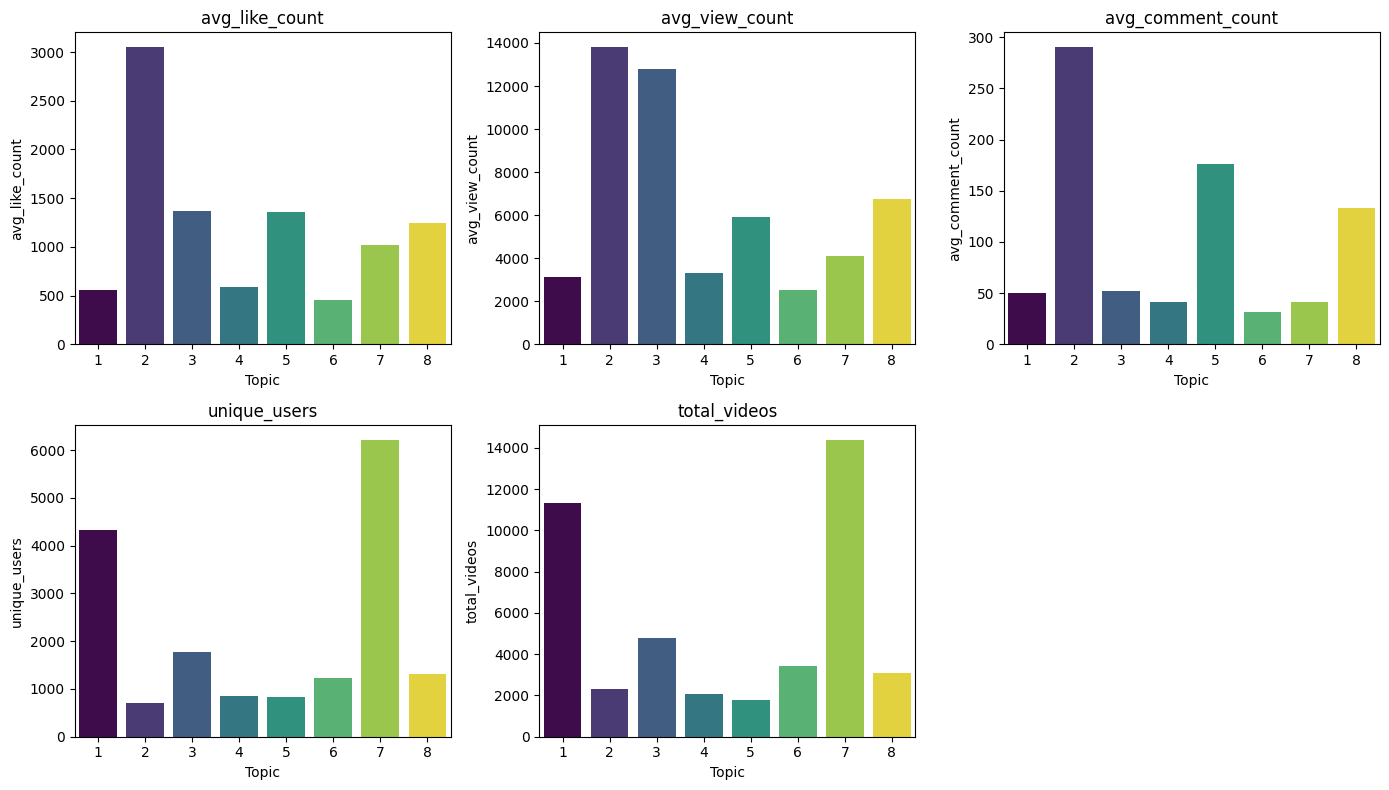

In [47]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
axes = axes.flatten()  # Flatten to iterate easily over axes

# Plot each metric as a bar chart by topic
for i, metric in enumerate(metrics):
    sns.barplot(
        data=topic_analytics,
        x='topic',
        y=metric,
        hue='topic',            
        palette='viridis',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(metric)
    axes[i].set_xlabel('Topic')
    axes[i].set_ylabel(metric)

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

/tmp/ipykernel_1536110/2451681124.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_regions = region_distribution.groupby('topic').apply(lambda grp: grp.nlargest(5, 'count')).reset_index(drop=True)


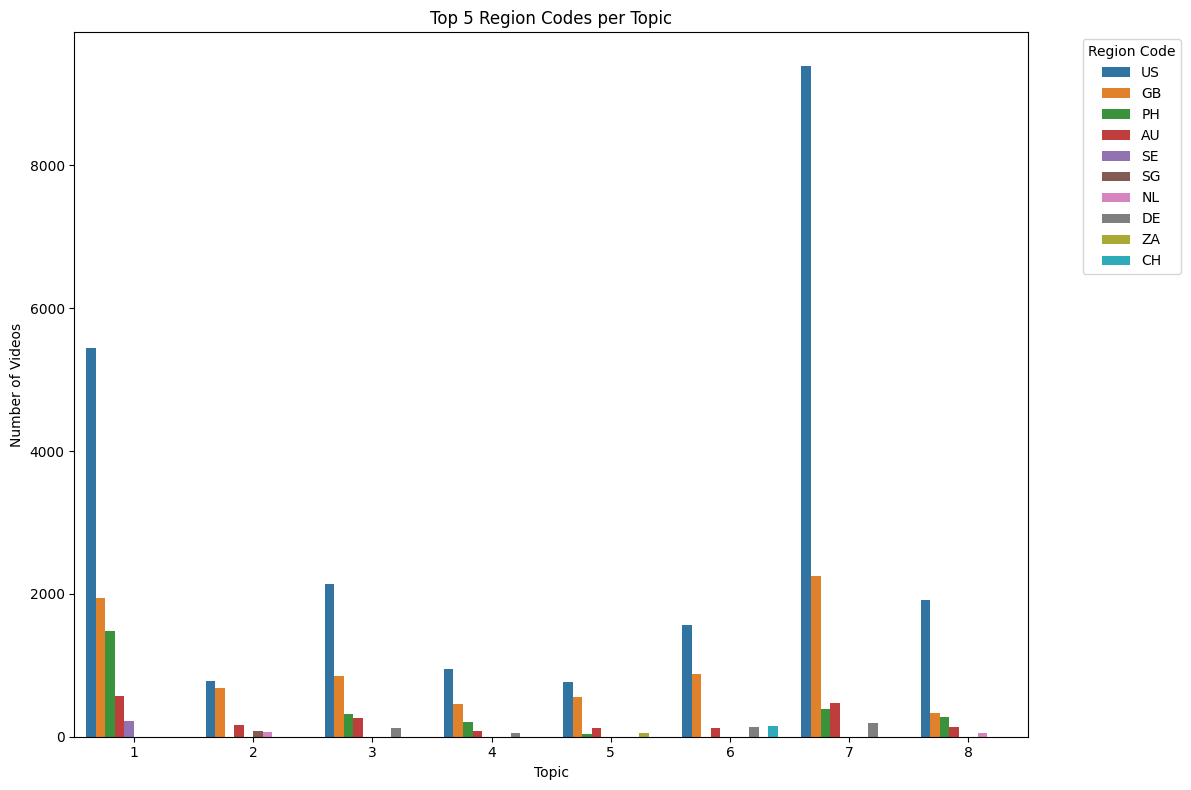

In [48]:
# Compute region distribution: count of videos for each (topic, region_code)
region_distribution = combined_df.groupby(['topic', 'region_code']).size().reset_index(name='count')

# For each topic, keep only the top 5 region codes
top_regions = region_distribution.groupby('topic').apply(lambda grp: grp.nlargest(5, 'count')).reset_index(drop=True)

# Plot a grouped bar chart for the top 5 region codes per topic
plt.figure(figsize=(12, 8))
sns.barplot(data=top_regions, x='topic', y='count', hue='region_code')
plt.title('Top 5 Region Codes per Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Videos')
plt.legend(title='Region Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1536110/766008303.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_regions = region_distribution.groupby('topic').apply(lambda grp: grp.nlargest(5, 'proportion')).reset_index(drop=True)


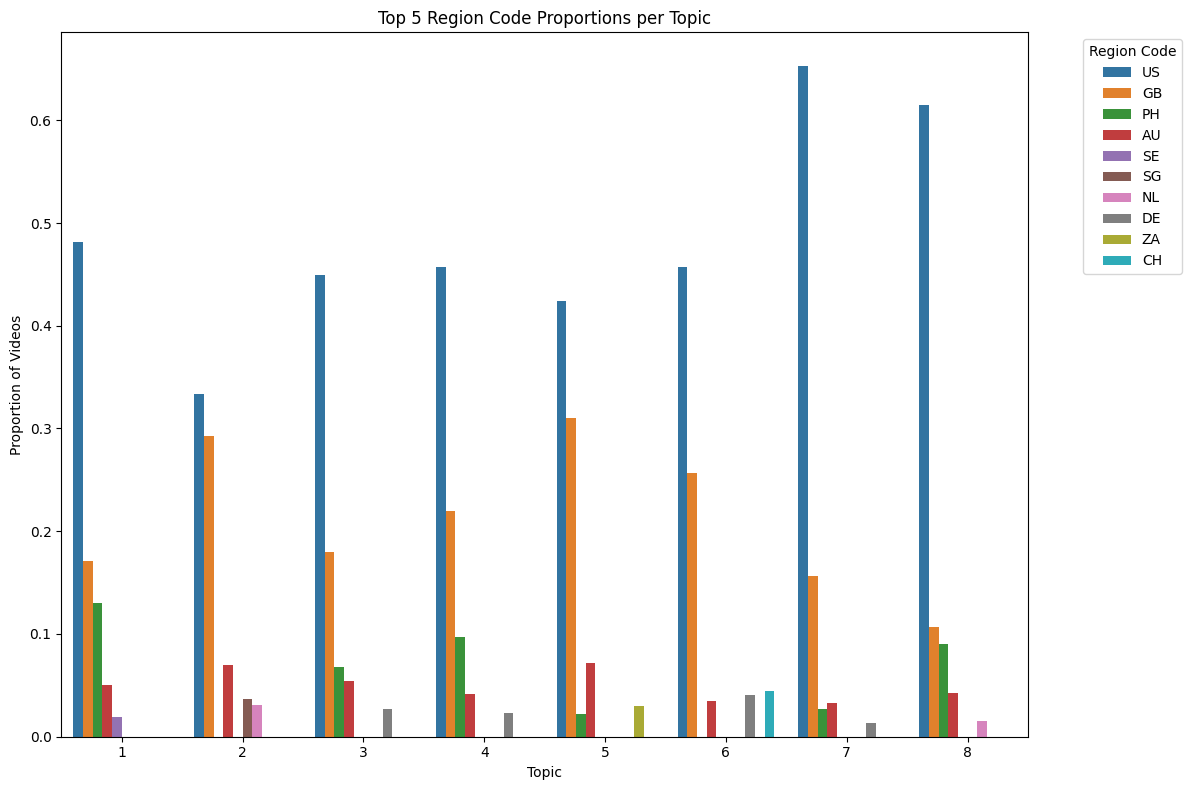

In [49]:
# Compute region distribution: count of videos for each (topic, region_code)
region_distribution = combined_df.groupby(['topic', 'region_code']).size().reset_index(name='count')

# Calculate total videos per topic
total_per_topic = region_distribution.groupby('topic')['count'].sum().reset_index().rename(columns={'count': 'total'})

# Merge total counts into region_distribution DataFrame
region_distribution = region_distribution.merge(total_per_topic, on='topic')

# Calculate the proportion for each region code within a topic
region_distribution['proportion'] = region_distribution['count'] / region_distribution['total']

# For each topic, keep only the top 5 region codes by proportion
top_regions = region_distribution.groupby('topic').apply(lambda grp: grp.nlargest(5, 'proportion')).reset_index(drop=True)

# Plot a grouped bar chart for the top 5 proportions per topic
plt.figure(figsize=(12, 8))
sns.barplot(data=top_regions, x='topic', y='proportion', hue='region_code')
plt.title('Top 5 Region Code Proportions per Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion of Videos')
plt.legend(title='Region Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()